# Data Visualization
*Author: [Douglas Strodtman](http://linkedin.com/in/dstrodtman/)*



Today's lesson will focus on visualizations using Pandas, Matplotlib, and Seaborn. By the end of the lesson you will feel empowered to make quick plots to visually explore trends in your data as well as feel comfortable customizing plots to make them ready for professional reports.

## Lesson Overview

1. Basic Pandas plotting
    - histogram
    - bar plot
    - scatter plot
    - line plot
1. Seaborn
    - heat map
    - pair plot
    - dist plot
    - box plot
1. Matplotlib
    - basic plotting functionality
    - plotting multiple plots to the same axes
    - customization

This lesson continues to build on the data that we've previously explored. We'll largely be rehasing previous investigations from lessons and labs, but now focusing on representing insights in visual format.

## Module Import
In addition to Pandas, we'll be importing Matplotlib and Seaborn.

Note that `pyplot` is a submodule of Matplotlib, and that both of these plotting modules have standard aliases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Import
Load the data we cleaned in the last lesson.

In [2]:
df = pd.read_csv('../data/clean1718.csv')

And, as always, check that your data loaded as expected.

In [3]:
df.head()

,budget_fiscal_year,department_name,fund_name,account_name,adopted_budget_amount,total_expenditures,budget_change_amount,budget_transfer_in_amount,budget_transfer_out_amount,total_budget,encumbrance_amount,pre_encumbrance_amount,budget_uncommitted_amount,account_group_name,fund,account,department
0,2018,AGING,GENERAL FUND (GENERAL BUDGET),CONTRACTUAL SERVICES,2222382.0,1608157.04,9000.0,0.0,453500.0,1777882.0,93331.0,0.0,76393.96,EXPENSES,100,003040,2
1,2018,AGING,TITLE VII OLDER AMERICANS ACT,OMBUDSMAN VII A PROGRAM,0.0,87876.00,87876.0,0.0,0.0,87876.0,0.0,0.0,0.00,UNSPECIFIED,564,02PB01,2
2,2018,AGING,SENIOR HUMAN SERVICES PROGRAM,EVIDENCE BASED PROGRAMS,0.0,292338.00,303447.0,0.0,0.0,303447.0,11109.0,0.0,0.00,UNSPECIFIED,42J,02R340,2
3,2018,AGING,AREA PLAN FOR THE AGING TIT 7,HOME DELIVERED MEALS FOR SENIORS,0.0,2419162.00,2543845.0,0.0,0.0,2543845.0,36122.0,0.0,88561.00,UNSPECIFIED,395,02PQ04,2
4,2018,AGING,GENERAL FUND (GENERAL BUDGET),OVERTIME GENERAL,3900.0,15943.36,0.0,13300.0,0.0,17200.0,0.0,0.0,1256.64,SALARIES AND BENEFITS,100,001090,2


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget_fiscal_year,7246.0,2.017504e+03,5.000174e-01,2.017000e+03,2017.00,2018.000,2.018000e+03,2.018000e+03
adopted_budget_amount,7246.0,3.807644e+06,3.720715e+07,0.000000e+00,0.00,0.000,2.612080e+05,1.114645e+09
total_expenditures,5106.0,1.189991e+07,1.348734e+08,0.000000e+00,36292.92,200215.785,1.478339e+06,5.256445e+09
budget_change_amount,7246.0,1.085642e+06,2.643066e+07,-6.064122e+07,0.00,2454.855,1.077022e+05,1.449055e+09
budget_transfer_in_amount,7246.0,1.199598e+05,1.696095e+06,0.000000e+00,0.00,0.000,0.000000e+00,8.594063e+07
budget_transfer_out_amount,7246.0,1.199598e+05,1.888885e+06,0.000000e+00,0.00,0.000,0.000000e+00,8.172030e+07
total_budget,7246.0,4.893286e+06,4.546800e+07,0.000000e+00,5756.00,98919.320,7.162205e+05,1.449055e+09
encumbrance_amount,7246.0,7.417492e+04,6.211738e+05,0.000000e+00,0.00,0.000,0.000000e+00,1.855431e+07
pre_encumbrance_amount,7246.0,4.686861e+03,8.393923e+04,0.000000e+00,0.00,0.000,0.000000e+00,4.069569e+06
budget_uncommitted_amount,7246.0,-3.571651e+06,1.050731e+08,-5.256445e+09,0.00,0.000,5.213389e+04,4.289099e+08


## A soapbox on plotting

First, you should read [this blog post](https://towardsdatascience.com/storytelling-with-data-a-data-visualization-guide-for-business-professionals-97d50512b407), which gives a brief synopsis of some of the key points presented in [_Storytelling with Data: A Data Visualization Guide for Business Professionals_](https://www.amazon.com/gp/product/1119002257/).

Creating good plots isn't easy, but it's worth the time and effort. Here's another fun [post that highlights some of the best and worst visualizations from 2018](https://www.kdnuggets.com/2019/02/best-worst-data-visualization-2018.html).

![](https://imgs.xkcd.com/comics/convincing.png)

Sometimes we're seeking to just create a quick and dirty visualization to get a snapshot into our data. I think of these as _images_ rather than _plots_. My basic criteria for a visualization to be considered a plot are:

1. It has a title.
1. Axes are labeled.
1. A legend is provided (if more than one color is used).
1. The correct _type_ of plot was selected...
1. ... to demonstrate a valid relationship.
1. Interpretation and context are provided.

These are the absolute bare minimum criteria. We should always try to:

1. Give consideration to scale.
1. Make all text legible for the intended presentation format.
1. Eliminate redundant information.
1. Where appropriate, order data to aid interpretability.
1. Choose colors that are color-blind friendly AND clearly distinguishable.

Without going too deep, here are some things to always keep in mind:

- Visual literacy, data literacy, technical literacy, and business acumen will vary drastically by audience. Make sure that you choose plotting methods that appropriate to the consumers of your visualizations.
- Plots for written reports can be dense, and oftentimes may be provided to allow the audience to visually explore relationships of interest to them. Providing your own commentary on ALL plots will ensure that even if their interests in the data diverge from your own, they can quickly align themselves to why YOU feel the plot is important.
- For presentations, your audience should be able to extract the core message from you plot in **3 seconds**. This allows your audience to focus on your stated message, rather than expending mental energy trying to figure out what you're trying to convey. Reducing clutter, using clear colors with high contrast, and formatting text to be visible from every seat in the meeting room are essential.
- Colors vary _drastically_ on different monitors, TVs, and projectors. Additionally, colorblindness is fairly common, especially in men of European descent. You should do your best to choose colors that will be easily differentiable regardless of tehnology-based rendering problems or genetic differences.

## Basic plots with Pandas

All that being said, we're going to start off doing some quick and dirty plots with Pandas.

#### What's good about Pandas plotting?

- It's quick
- It's easy
- It ~~generally~~ **often** makes smart choices
- You can always customize it after (more on this later)

#### What's bad about Pandas plotting?

- It makes assumptions
- Customization can be cumbersome
- Generating incorrect plots is easy
- Some default settings are **_bad_**

### Pandas histogram

Histograms are great to show the distribution of a numeric variable in your dataset.

Let's look at the distribution of our `total_budget` column.

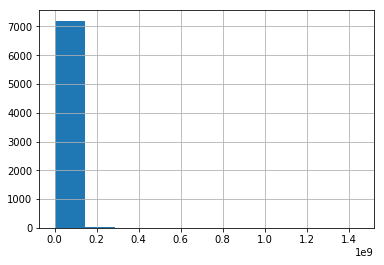

In [5]:
df['total_budget'].hist()

This is a bad histogram. We can see that almost all of our values are between 0 and (it looks like) 175k dollars. Let's try using a mask to have a more reasonable histogram.

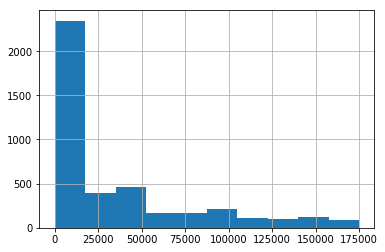

In [6]:
df.loc[df['total_budget'] < 175000, 'total_budget'].hist()

We still see a majority of our line items are in our first bin, so less than roughly \$20k. We'll leave this as is for now.

### Pandas bar plot

Bar plots are a great way to represent numeric data, often when you're most interested in representing the count or total of some value, often grouped by a condition.

Let's make a bar plot of our `account_group_name`.

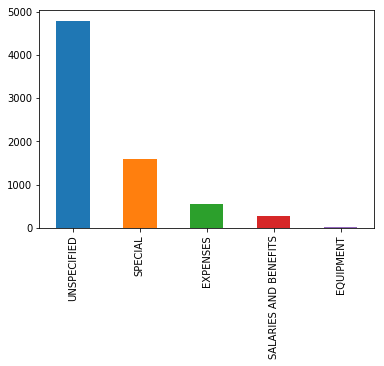

In [7]:
df['account_group_name'].value_counts().plot(kind='bar')

Even for a quick glimpse into our data, we might prefer to be able to read our group names. It's easy to make a horizontal bar plot instead.

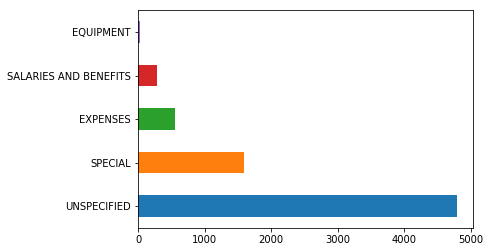

In [8]:
df['account_group_name'].value_counts().plot(kind='barh')

We can see that most of our entries don't have an `account_group_name` specified. This plot isn't great (how many equipment entries are there?), but we'll move on for now.

### Pandas scatter plot

A scatter plot is useful for demontstrating a relationship *between* two numeric features. Generally, you'll want these to be continuous (think `float`s), although sometimes discrete values (think `int`s) will work.

Here, we'll explore the relationship between `total_budget` and `total_expenditures`.

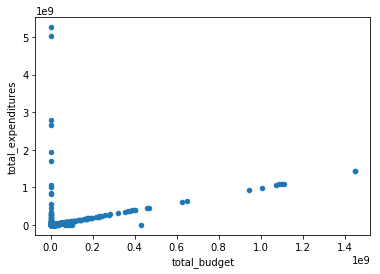

In [9]:
df.plot(kind='scatter', x='total_budget', y='total_expenditures')

Note that scatter plots imply that there is a relationship between the two variables being explored, and that many people will want to read them as the `y` variable being dependent on the `x` variable.

### Pandas line plot

A line plot is **only** appropriate when there is a sequential/ordinal relationship between points on your X-axis, such as:
- time
- qualitative ratings
- discrete measurements

Things that would be inappropriate on the X axis (these are real things I've seen):
- state/country names
- zip codes
- monotonically increasing ID

Unfortunately, we only have two years in our currently loaded dataset. For demonstration purposes, we'll do a simple line graph on the grand total of expenditures each year.

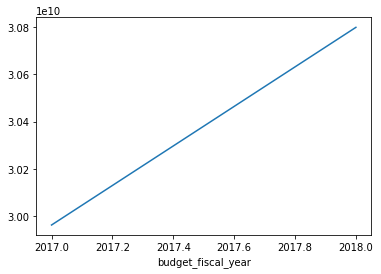

In [10]:
df.groupby('budget_fiscal_year')['total_expenditures'].sum().plot(kind='line', )

Definitely not a good plot.

We could quickly download and load some [stock data from Yahoo](https://finance.yahoo.com/quote/AAPL/history/) though:

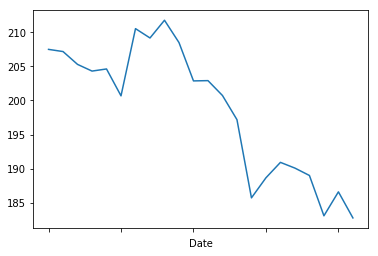

In [11]:
pd.read_csv('/Users/douglasstrodtman/Downloads/AAPL.csv', index_col='Date')['Close'].plot(kind='line')

## Advanced plots with Seaborn

Before proceeding, I want you to note that in the 0.9.0 release, Seaborn added a number of new plotting functions. Many of these are actually the most basic plotting functions, as Seaborn was really designed as a package to provide highly-specialized visualizations difficult to configure in Matplotlib.

#### What's good about Seaborn?
- Generally great default settings
- Provides easy access to difficult plots
- A pretty friendly API build to work with Pandas

#### What's bad about Seaborn?
- Easy to generate overly complicated plots that will crash your kernel
- Some plots are inappropriate for certain audiences and/or presentation slides
- Technical implementation of some plots prevents further customization (or at least creates a high barrier to access)

Here I'll be focusing on a number of plots that I feel Seaborn does exceptionally.

### Seaborn heat map

A heat map applies color to tabular data corresponding to the numbers in each cell. I really like this plot paired with Pandas `.corr` method, which calculates the correlation between variables.

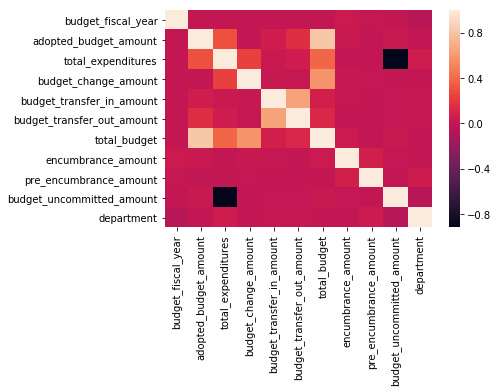

In [12]:
sns.heatmap(df.corr())

[Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) relates to the covariance demonstrated by two variables. Positive values mean that, at the aggregate level, as one variable increases, so does the other. Negative would indicate that values trend in opposite directions.

### Seaborn pair plot

The `pairplot` method can be useful when you want to explore all of the linear relationships between numeric columns.

/Users/douglasstrodtman/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/douglasstrodtman/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


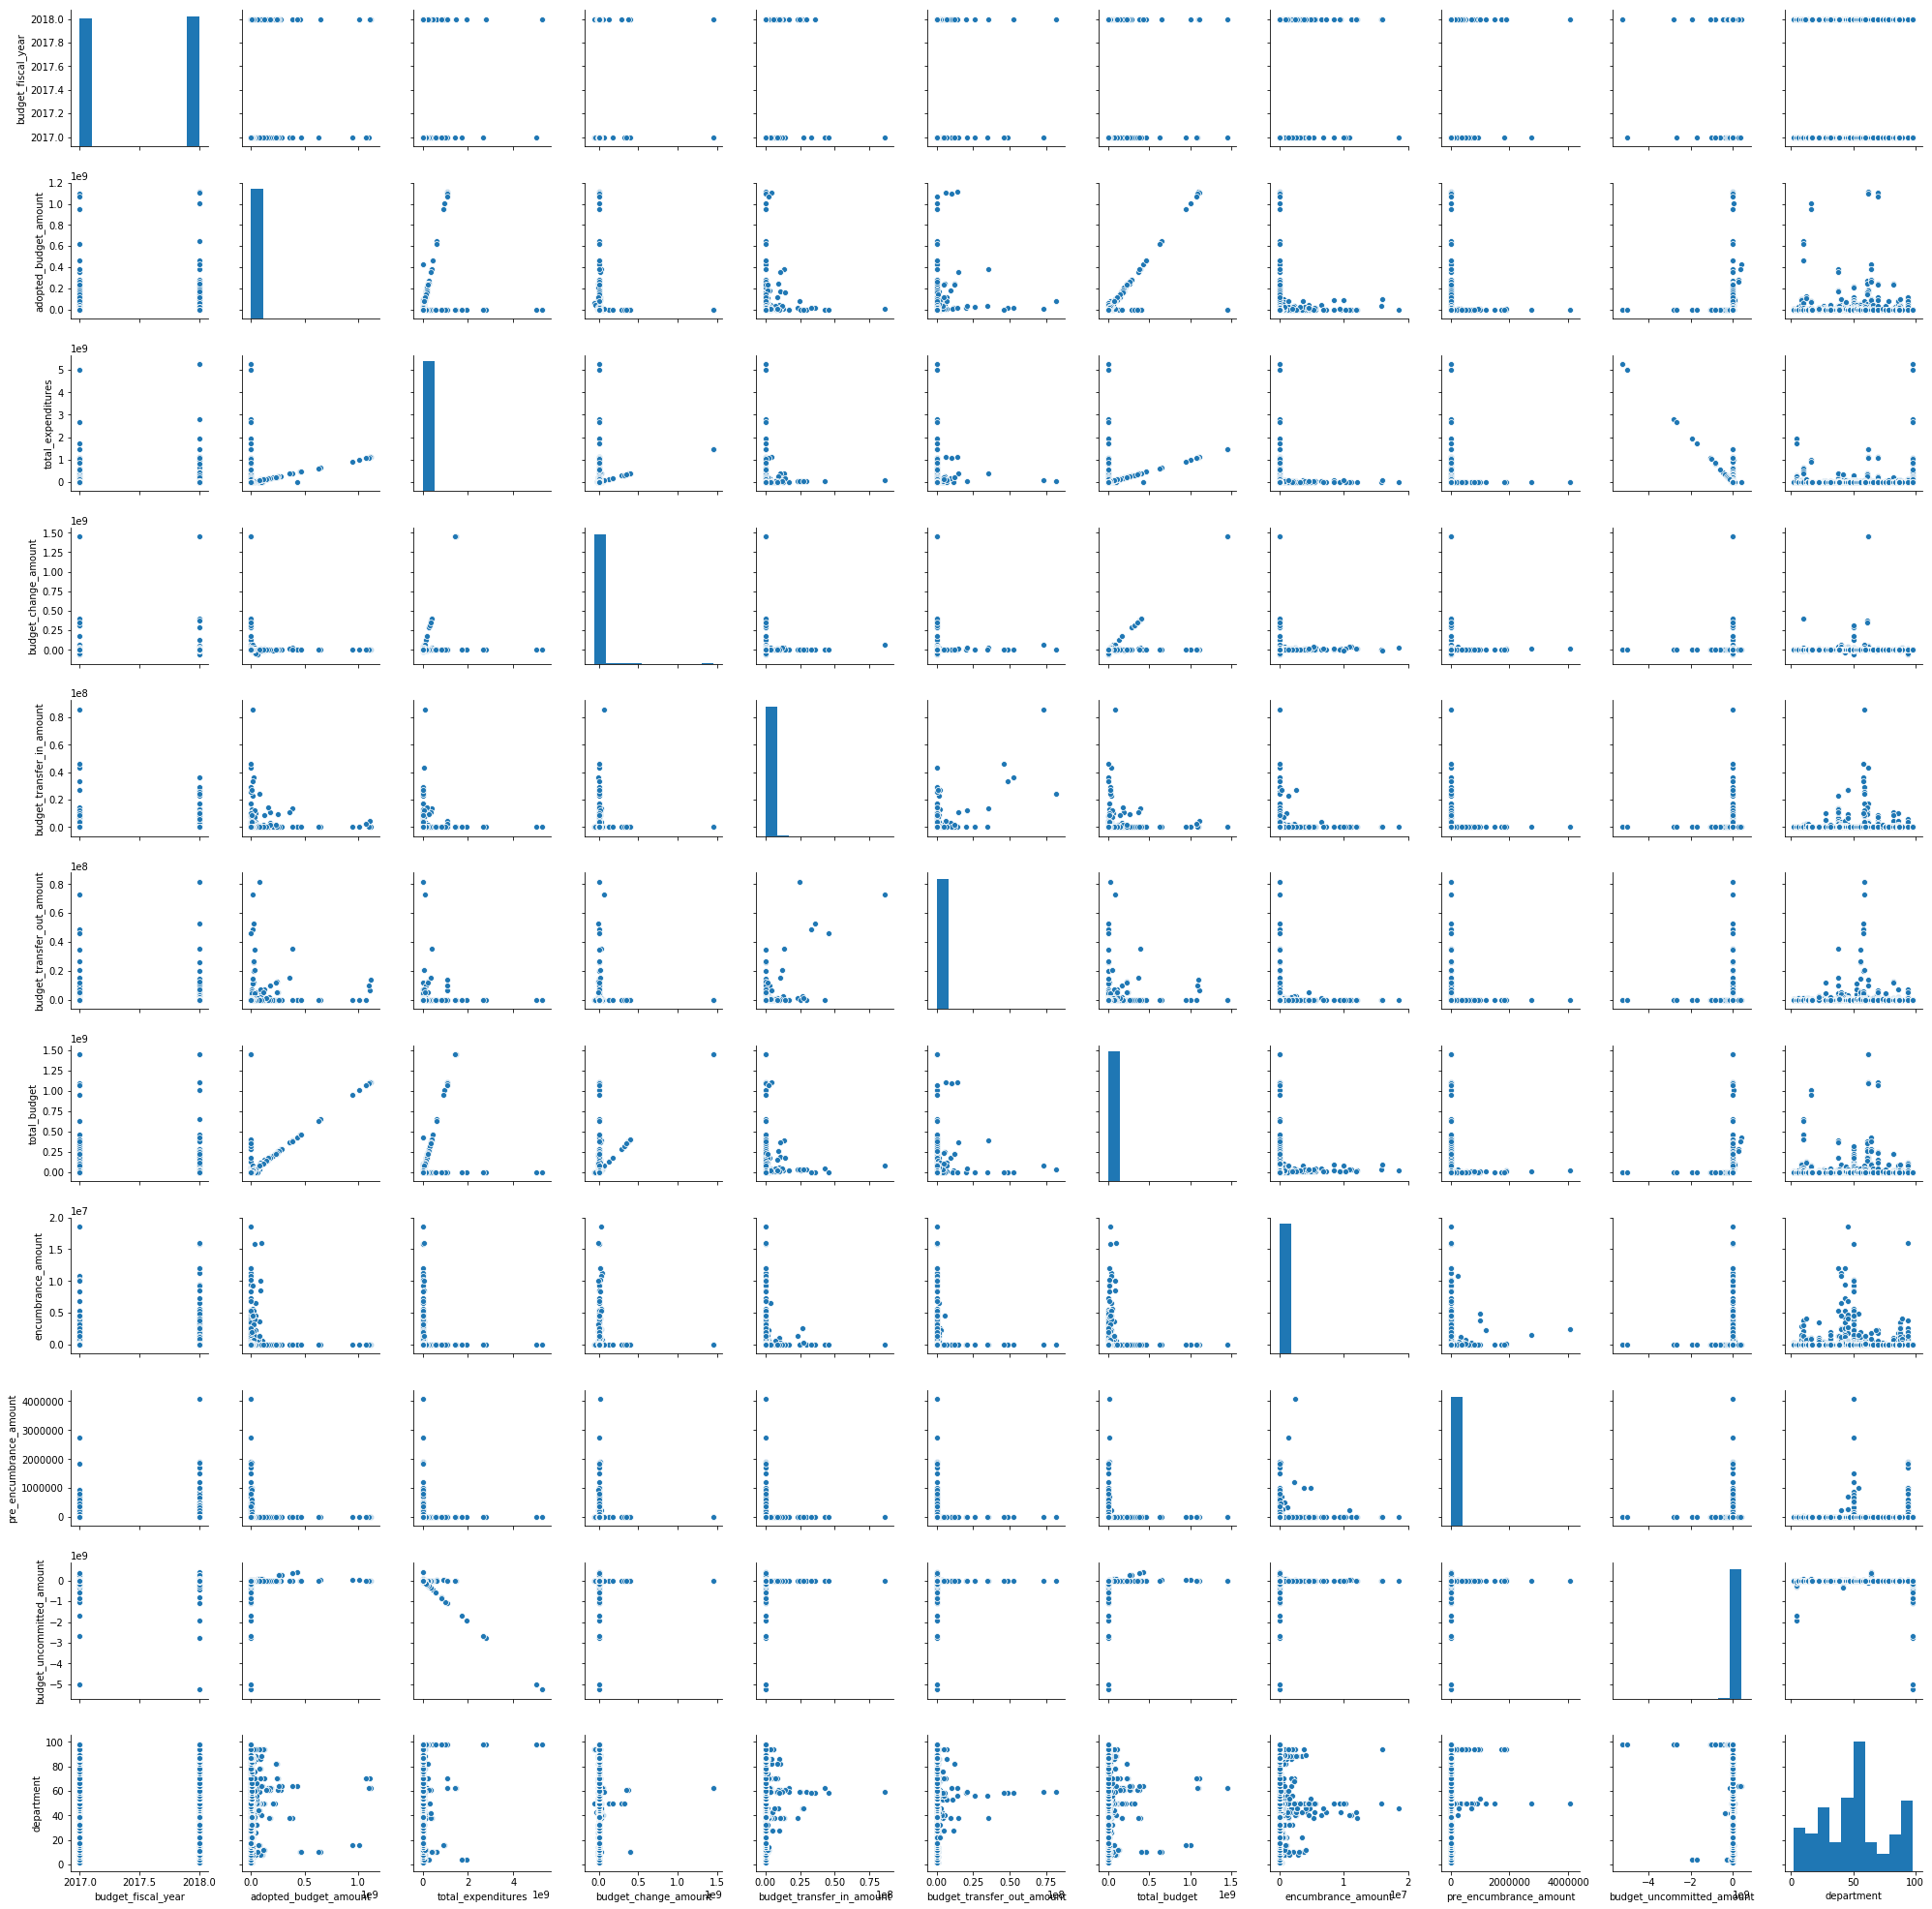

In [13]:
sns.pairplot(df)

The diagonal defaults to be a histogram for the variable. Note that paired with the heatmap above, we can now see which relationships resulted in positive and negative correlations.

As you can see, with only 11 numeric fields, this is already almost impossible to interpret. Also, by default our year and the numeric representation of `department` are included.

### Seaborn dist plot

`distplot` can be thought of as basically just a fancy histogram. 

Note that the line being drawn is the kernal density estimate, analogous to the probability mass/distribution function. This line isn't always appropriate to draw, especially as it can tend to visually represent likelihoods that fall outside of the bounded expectations.

From the output of our pair plot above, we can see that we don't really have any great histograms to make. I'm going to use `department` for demonstration purposes.

/Users/douglasstrodtman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


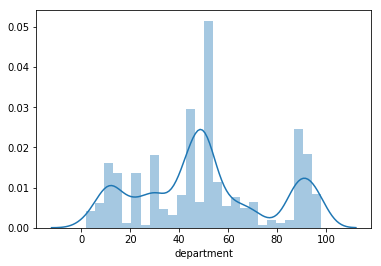

In [14]:
sns.distplot(df['department'])

Of course, this isn't a good plot, as we have no reason to think that the `department` column represents a meaningful ordinal relationship.

I would argue that the kde line would be inappropriate if this were plotting a valid relationship, as it suggests discrepancies between discrete bins may actually be smoother than they are.

### Seaborn box plots

Box plots are a great way to visually communicate central tendency and spread for discretely-binned numeric data.

Here, we'll look at the spread of total expenditures on salaries year-to-year.

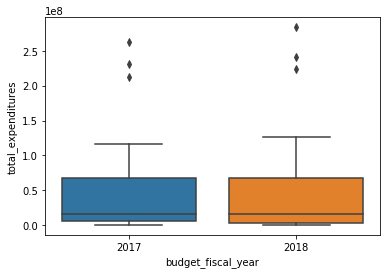

In [15]:
sns.boxplot(x='budget_fiscal_year', y='total_expenditures', data=df[df['account_name'] == "SALARIES GENERAL"])

### Seaborn dog plot

Make sure you shift-tab to read the doc string.

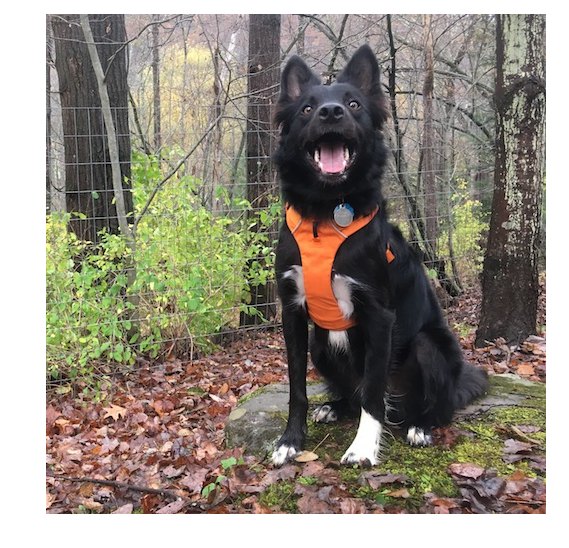

In [16]:
sns.dogplot()

## Matplotlib Plotting

Now we're going to build out a single plot to visualize a question from our lab:

**Which department had the most line item entries each year?**

We'll start by creating a pivot table, getting rid of any nulls values (due to now have entries for a given year), and sorting our counts by their values in 2017.

In [17]:
dept_by_year = df.pivot_table(values='fund_name', index='department_name', columns='budget_fiscal_year', aggfunc='count')
dept_by_year.fillna(0, inplace=True)
dept_by_year.sort_values(2017, inplace=True)

We will now iteratively build up a plot in matplotlib, doing the following:

- Creating a single bar plot from a Series
- Adding a second bar plot
- Changing the figure size
- Adjusting the width of bars
- Adjusting the alignment of bars
- Setting the x and y labels
- Setting the title
- Creating a legend
- Getting the current axis
- Rotating x ticks
- Aligning x ticks
- Changing all font sizes
- Saving figure

Let's get started.

### Creating a single bar plot from a Series

<BarContainer object of 54 artists>

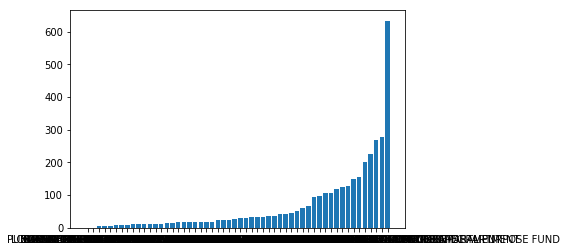

In [18]:
plt.figure()
plt.bar(dept_by_year.index, dept_by_year[2017])

### Adding a second bar plot

<BarContainer object of 54 artists>

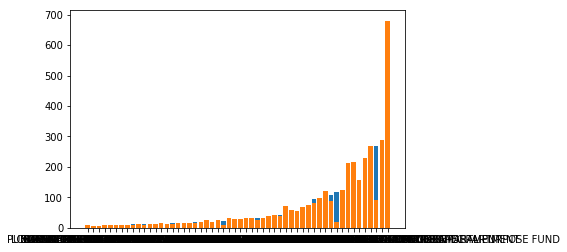

In [19]:
plt.figure()
plt.bar(dept_by_year.index, dept_by_year[2017])
plt.bar(dept_by_year.index, dept_by_year[2018])

### Changing the figure size

<BarContainer object of 54 artists>

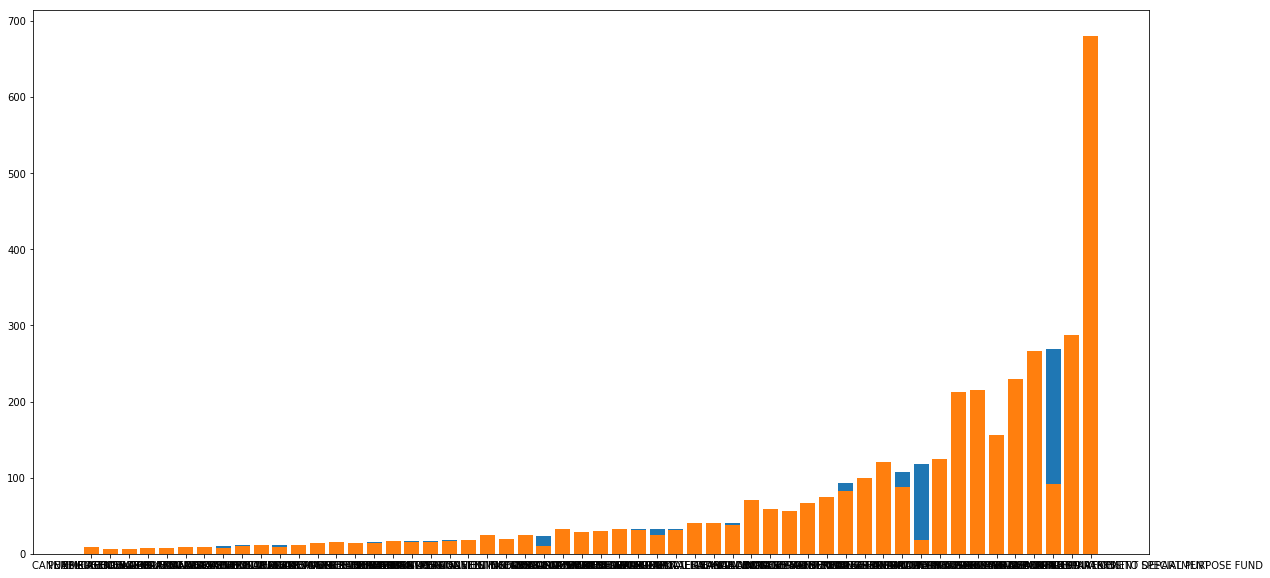

In [20]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017])
plt.bar(dept_by_year.index, dept_by_year[2018])

### Adjusting the width of bars

<BarContainer object of 54 artists>

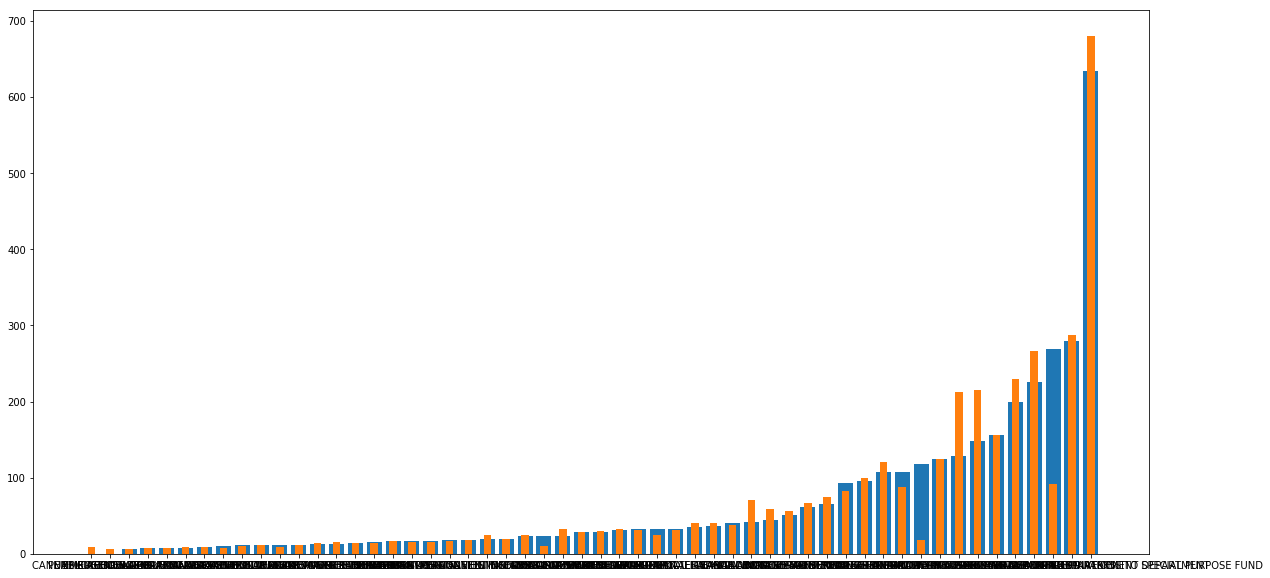

In [21]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017])
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4)

### Adjusting the alignment of bars

<BarContainer object of 54 artists>

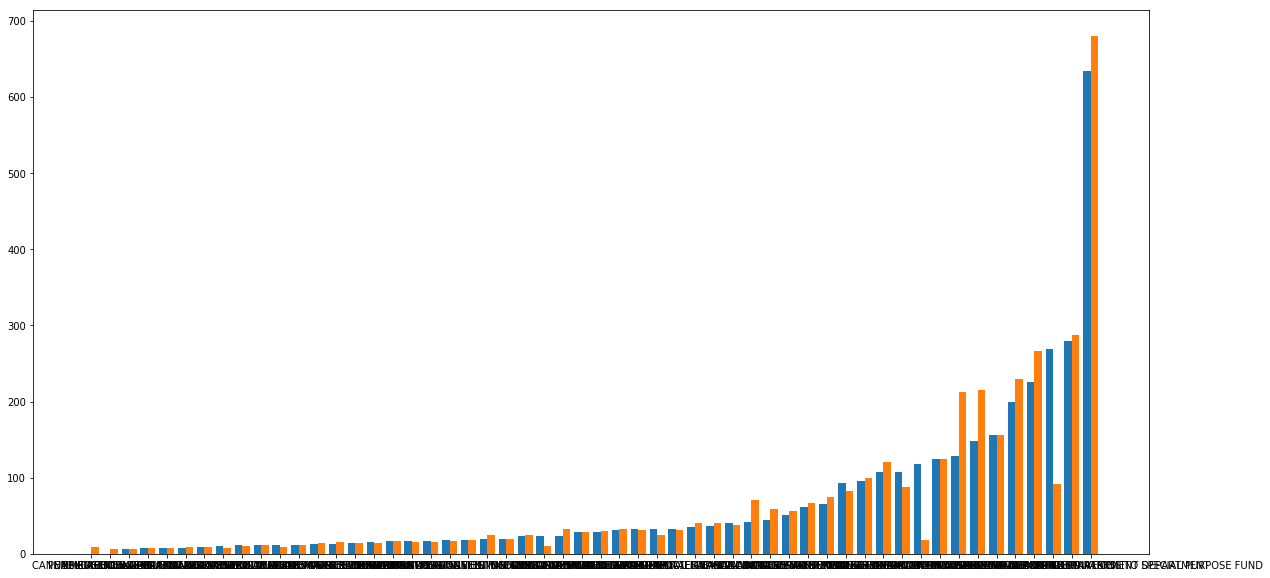

In [22]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')

### Setting the x and y labels

Text(0, 0.5, 'Number of Line Items')

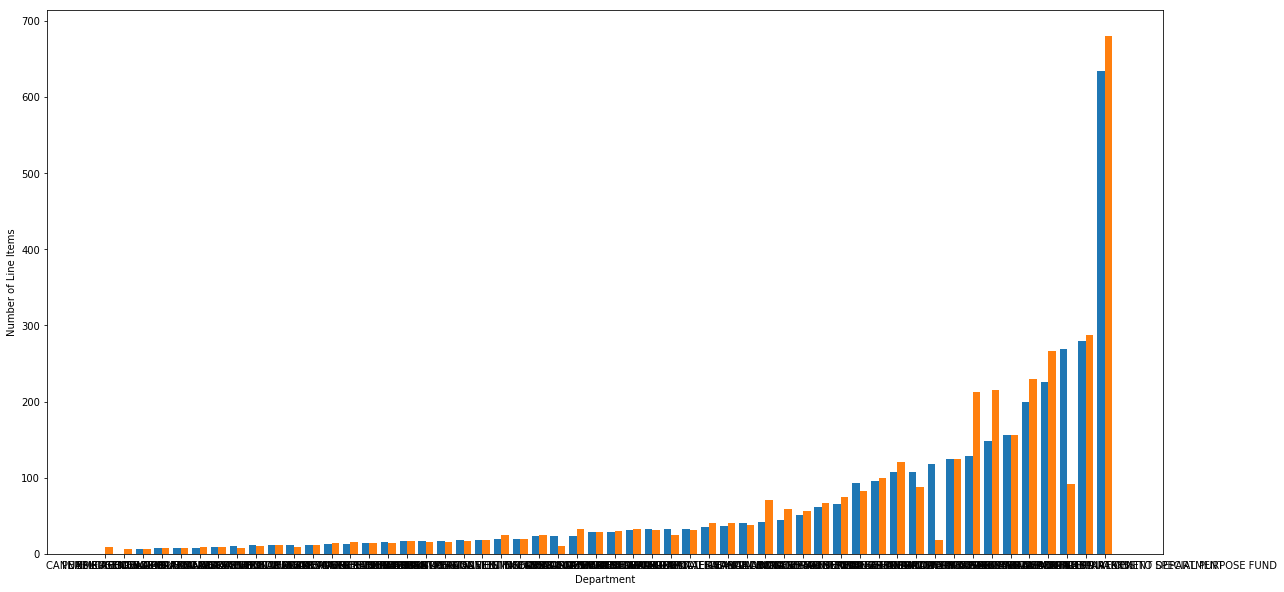

In [23]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')

### Setting the title

Text(0.5, 1.0, 'Number of Line Items by Department:\n2017 & 2018')

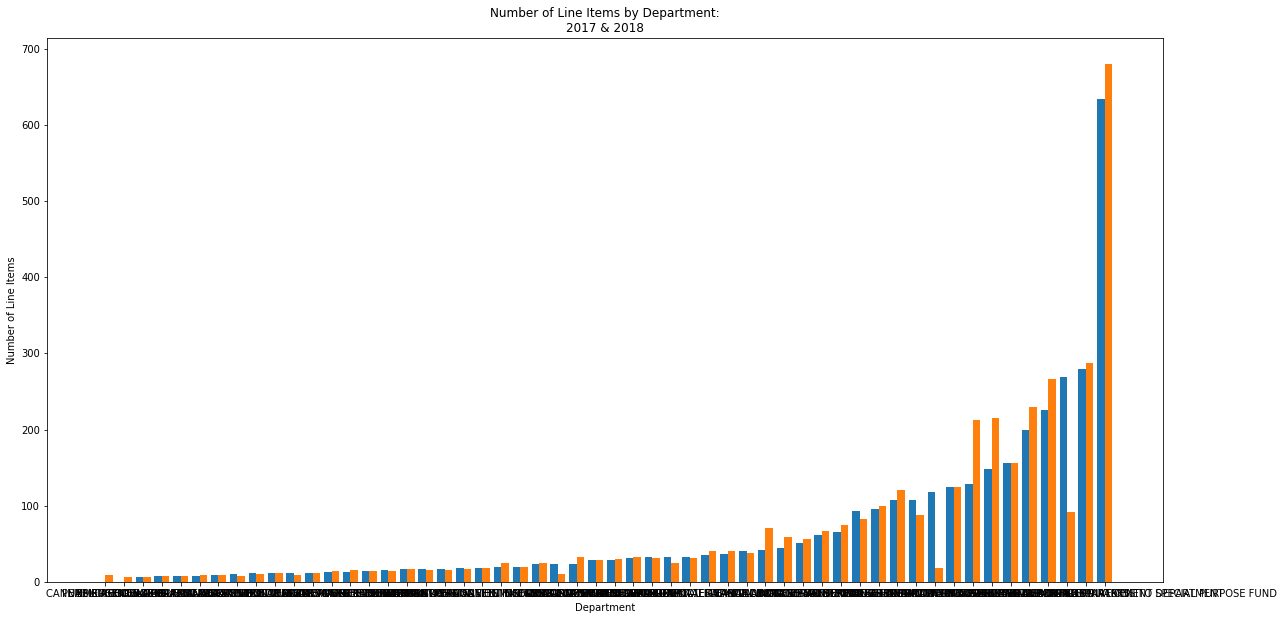

In [24]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')
plt.title('Number of Line Items by Department:\n2017 & 2018')

### Creating a legend

Text(0.5, 1.0, 'Number of Line Items by Department:\n2017 & 2018')

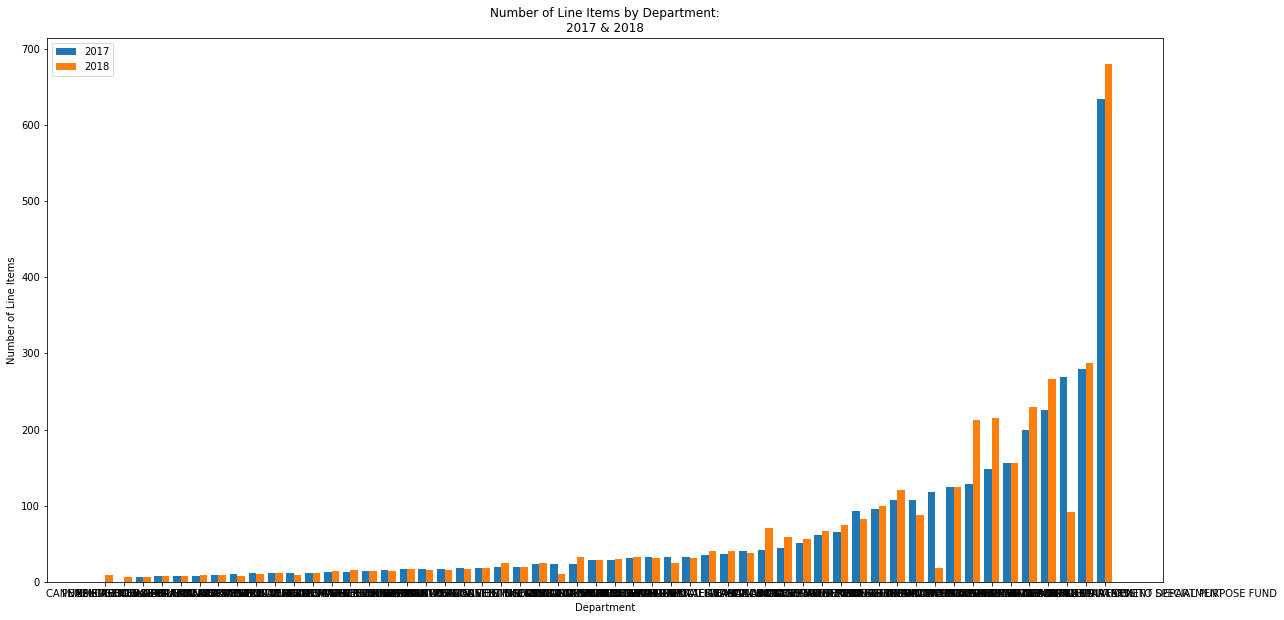

In [25]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')
plt.legend([2017,2018])
plt.title('Number of Line Items by Department:\n2017 & 2018')

### Getting the current axis

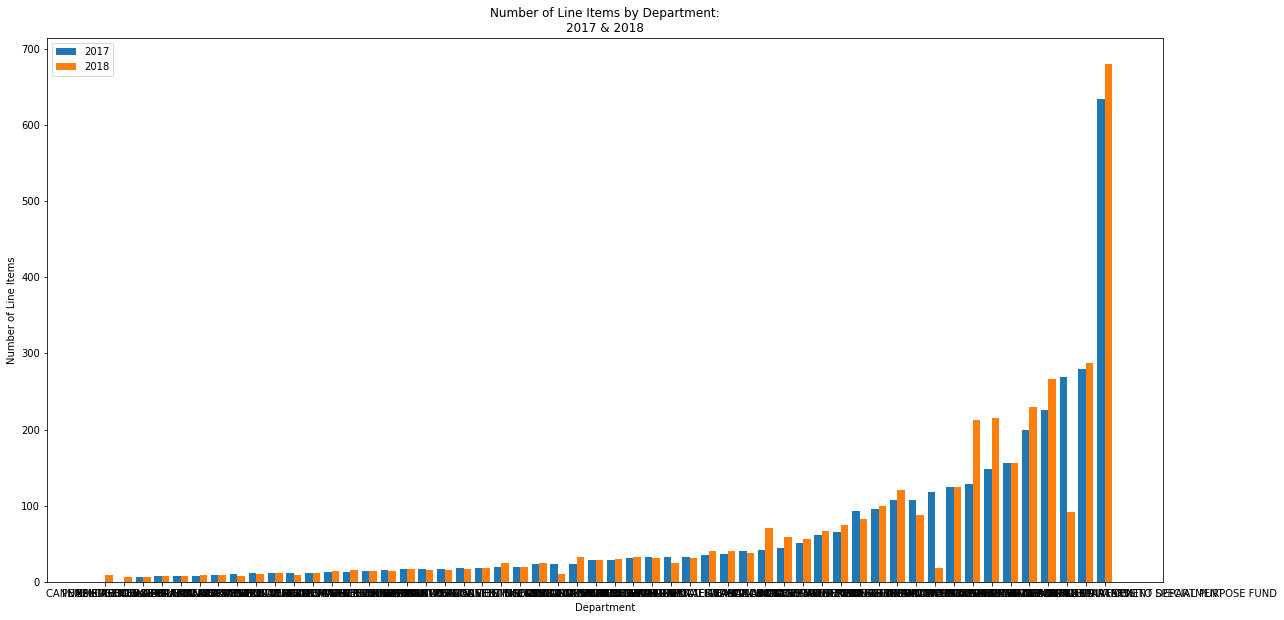

In [26]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')
plt.legend([2017,2018])
plt.title('Number of Line Items by Department:\n2017 & 2018')
ax = plt.gca()

### Rotating x ticks


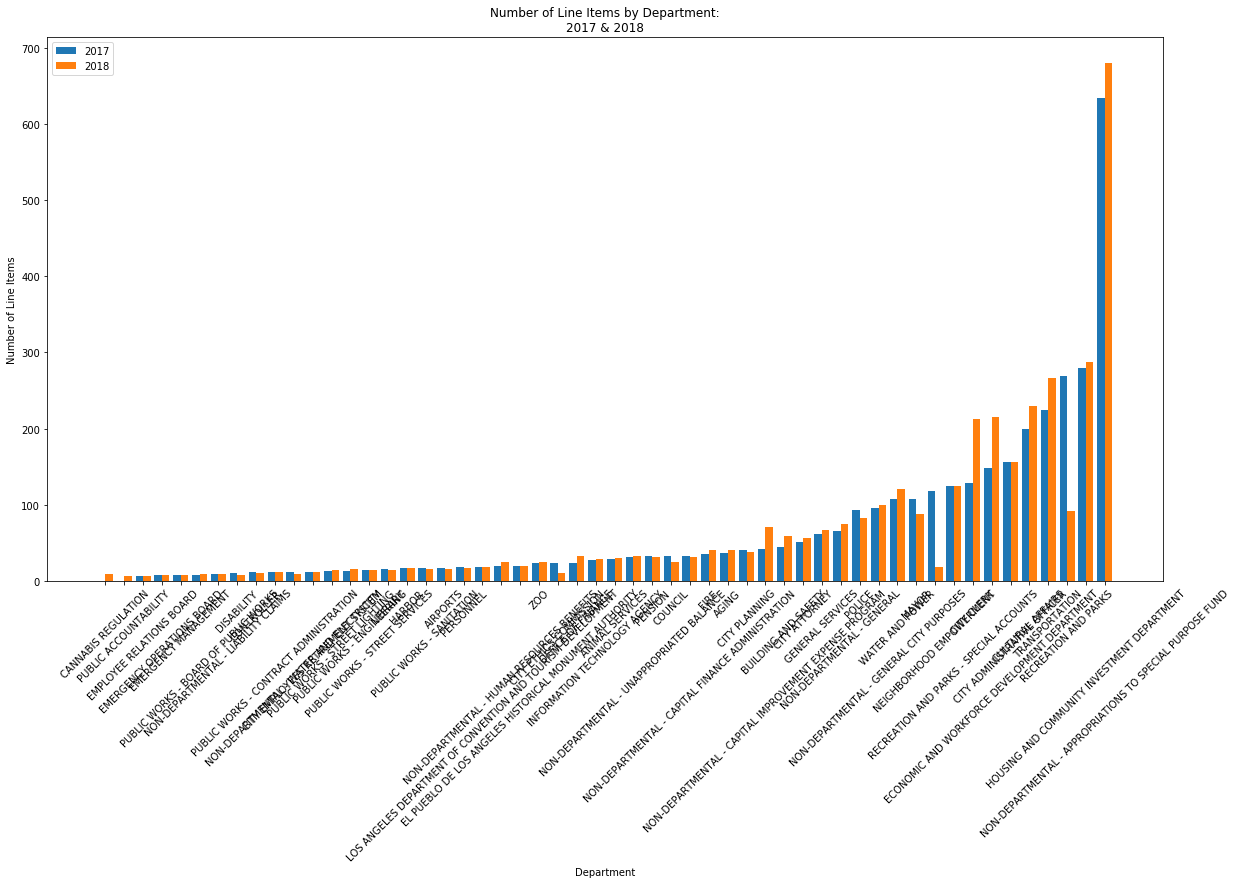

In [27]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')
plt.legend([2017,2018])
plt.title('Number of Line Items by Department:\n2017 & 2018')
ax = plt.gca()
ax.set_xticklabels(dept_by_year.index, rotation=45);

### Aligning x ticks

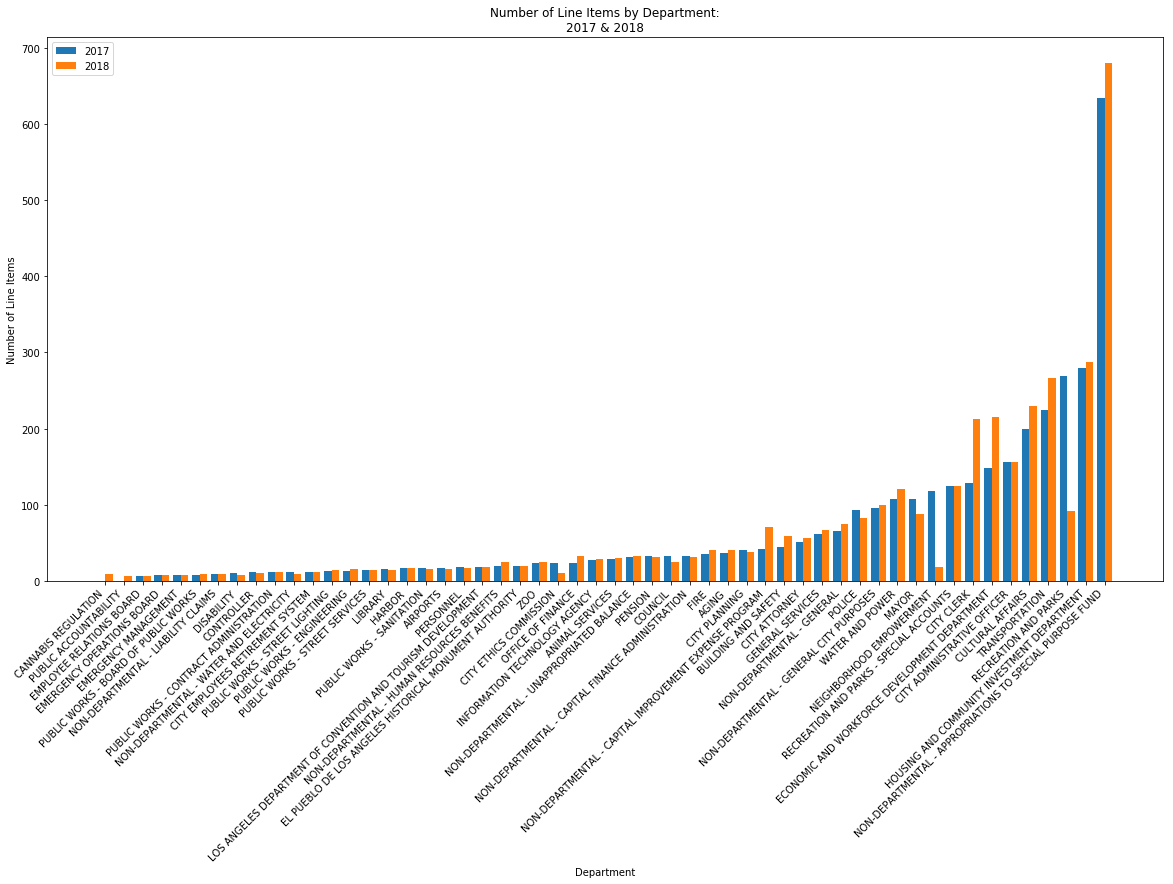

In [28]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department')
plt.ylabel('Number of Line Items')
plt.legend([2017,2018])
plt.title('Number of Line Items by Department:\n2017 & 2018')
ax = plt.gca()
ax.set_xticklabels(dept_by_year.index, rotation=45, ha='right');

### Changing all font sizes

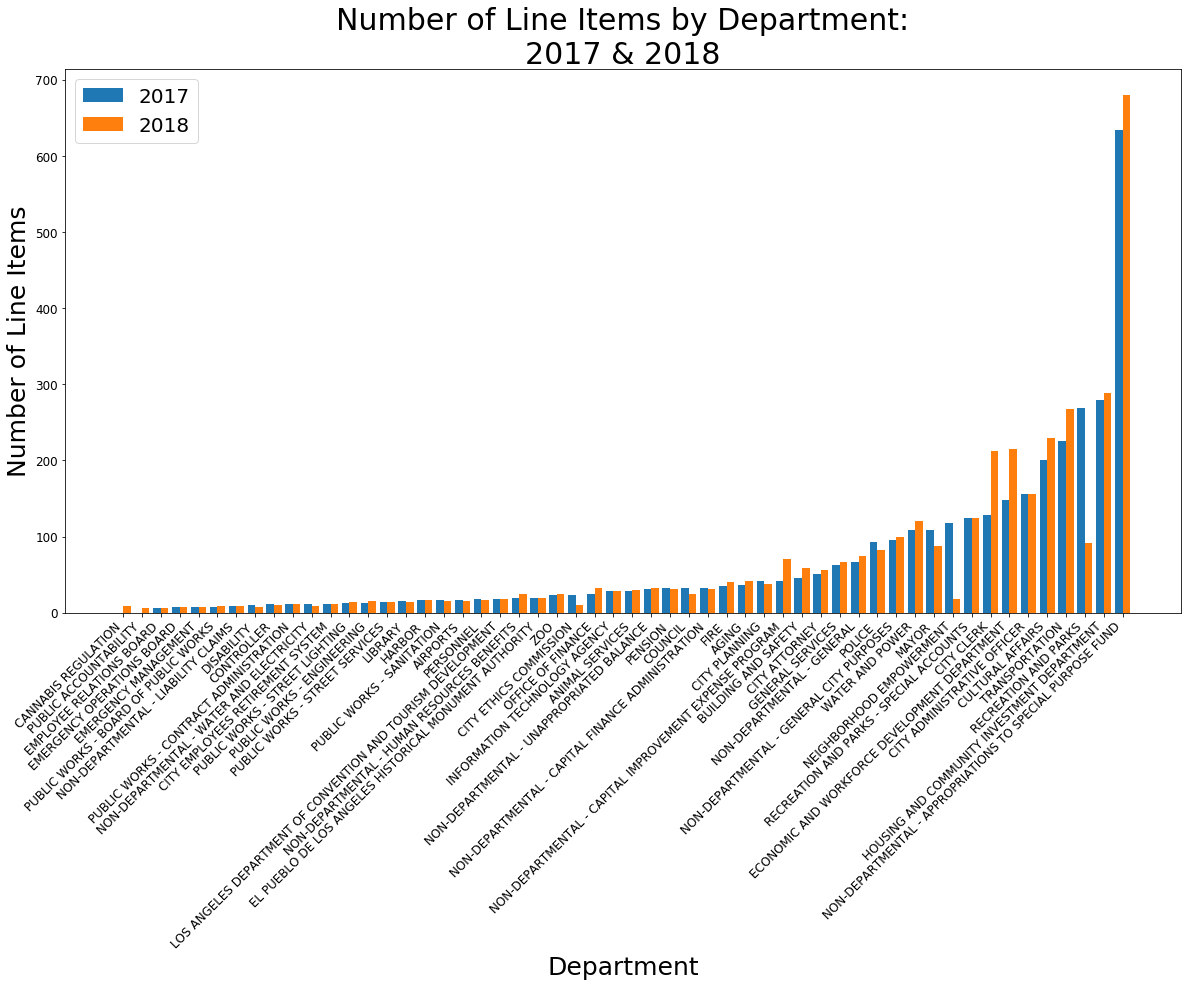

In [29]:
plt.figure(figsize=(20,10))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department', fontsize=25)
plt.ylabel('Number of Line Items', fontsize=25)
plt.legend([2017,2018], fontsize=20)
plt.title('Number of Line Items by Department:\n2017 & 2018', fontsize=30)
ax = plt.gca()
ax.set_xticklabels(dept_by_year.index, rotation=45, ha='right', fontsize=12)
plt.tick_params(labelsize=12, axis='y')

### Saving out our figure

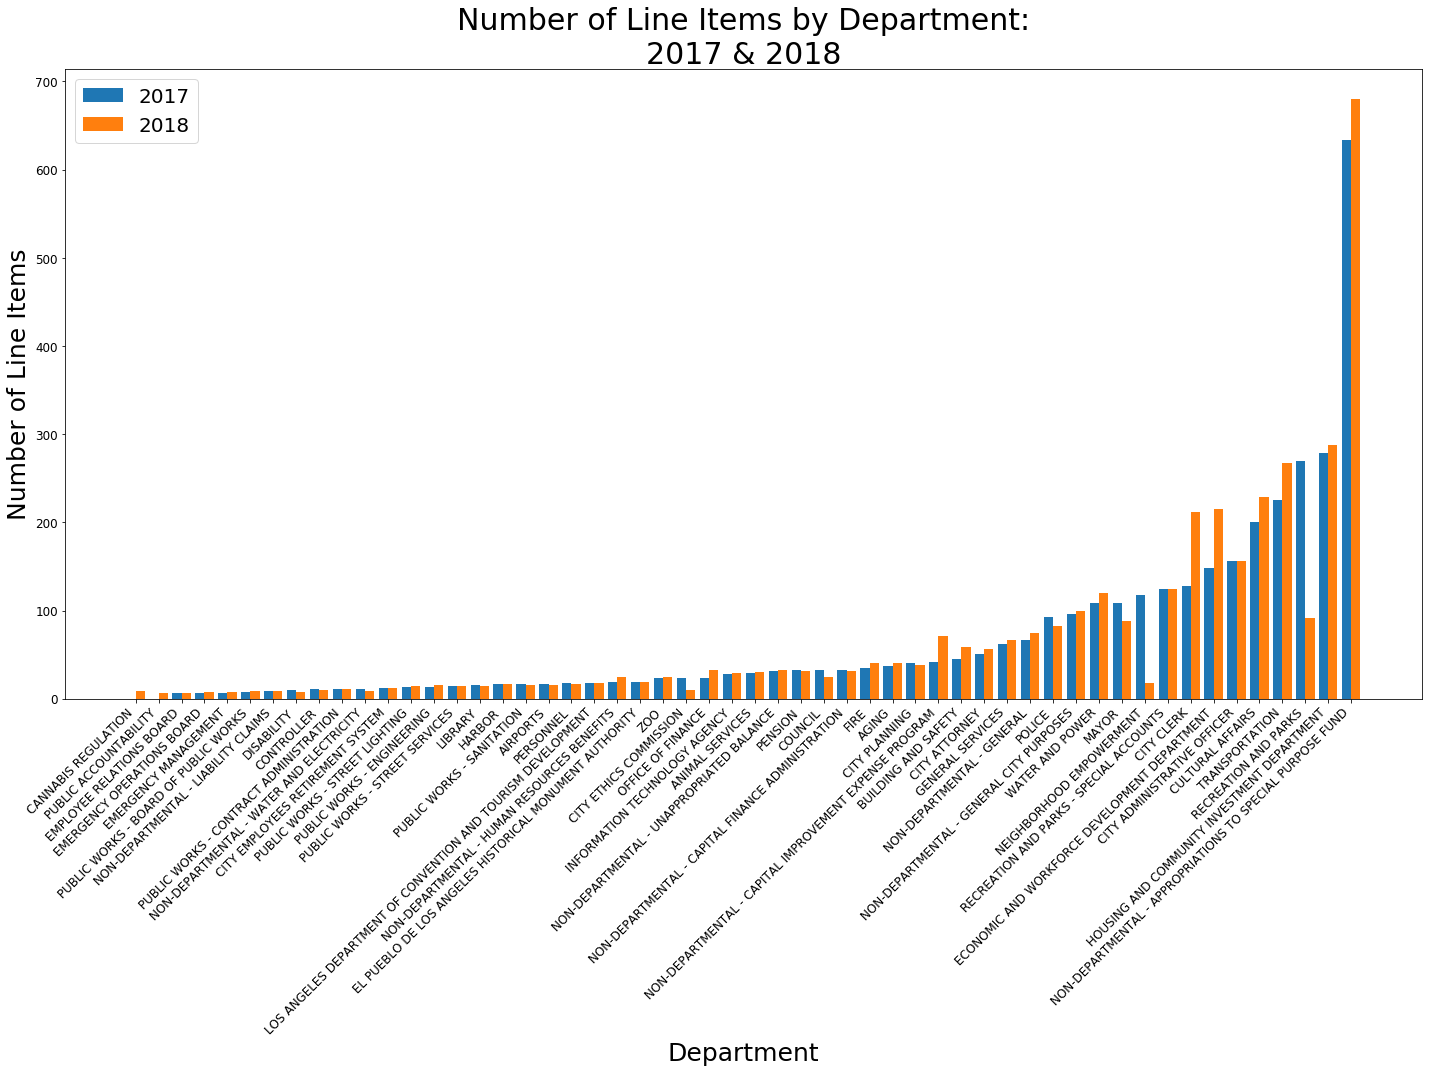

In [30]:
plt.figure(figsize=(20,15))
plt.bar(dept_by_year.index, dept_by_year[2017], width=-.4, align='edge')
plt.bar(dept_by_year.index, dept_by_year[2018], width=.4, align='edge')
plt.xlabel('Department', fontsize=25)
plt.ylabel('Number of Line Items', fontsize=25)
plt.legend([2017,2018], fontsize=20)
plt.title('Number of Line Items by Department:\n2017 & 2018', fontsize=30)
ax = plt.gca()
ax.set_xticklabels(dept_by_year.index, rotation=45, ha='right', fontsize=12)
plt.tick_params(labelsize=12, axis='y')
plt.tight_layout()
plt.savefig('../images/pyladies_sample.png')